In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

/Users/vinithangadi/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
dataset = pd.read_csv('appdata.csv')
dataset.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [3]:
dataset.shape

(50000, 12)

# Exploratory Data Analysis

### No missing values. The 18926 missing values in enrolled_date are of the customers that didn't enroll.

In [4]:
dataset.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
dataset['hour']

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [6]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [7]:
dataset.hour

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [8]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
dataset_plot = dataset.copy().drop(columns = ['user', 'first_open','screen_list','enrolled','enrolled_date'])

### All days of the week seems to have equal frequency of logins to the app
### People seem to login to the either early hours of the day (12AM - 3AM) and later (3PM - 12AM)
### Most users are young (age 20 - 30)

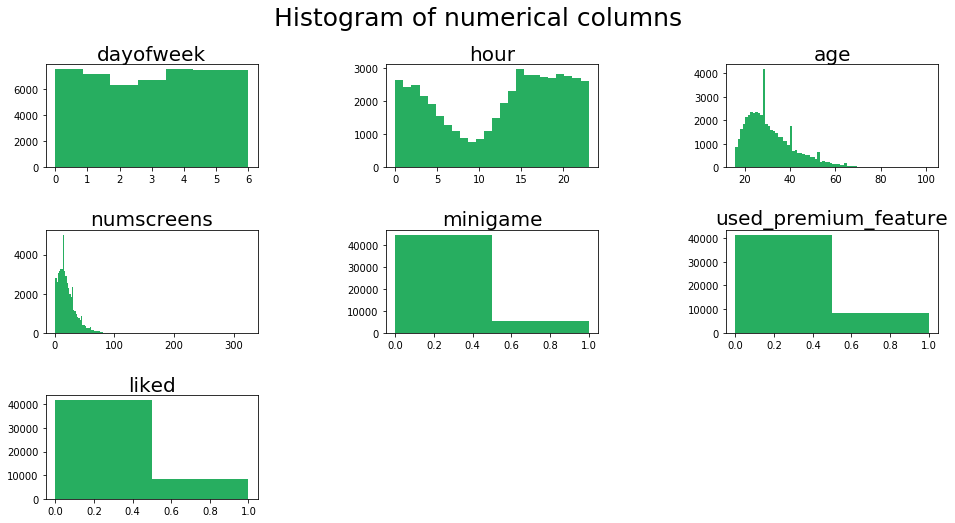

In [10]:
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
plt.suptitle('Histogram of numerical columns', fontsize = 25)
for i in range(1, dataset_plot.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset_plot.columns.values[i-1], fontdict = {'fontsize': 20,
            'verticalalignment': 'baseline'}, pad = 1)
    vals = np.size(dataset_plot.iloc[:,i-1].unique())
    plt.hist(dataset_plot.iloc[:, i-1], bins = vals, color = '#27AE60')

In [11]:
sns.set(style = 'white', font_scale = 2)

In [12]:
corr = dataset_plot.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

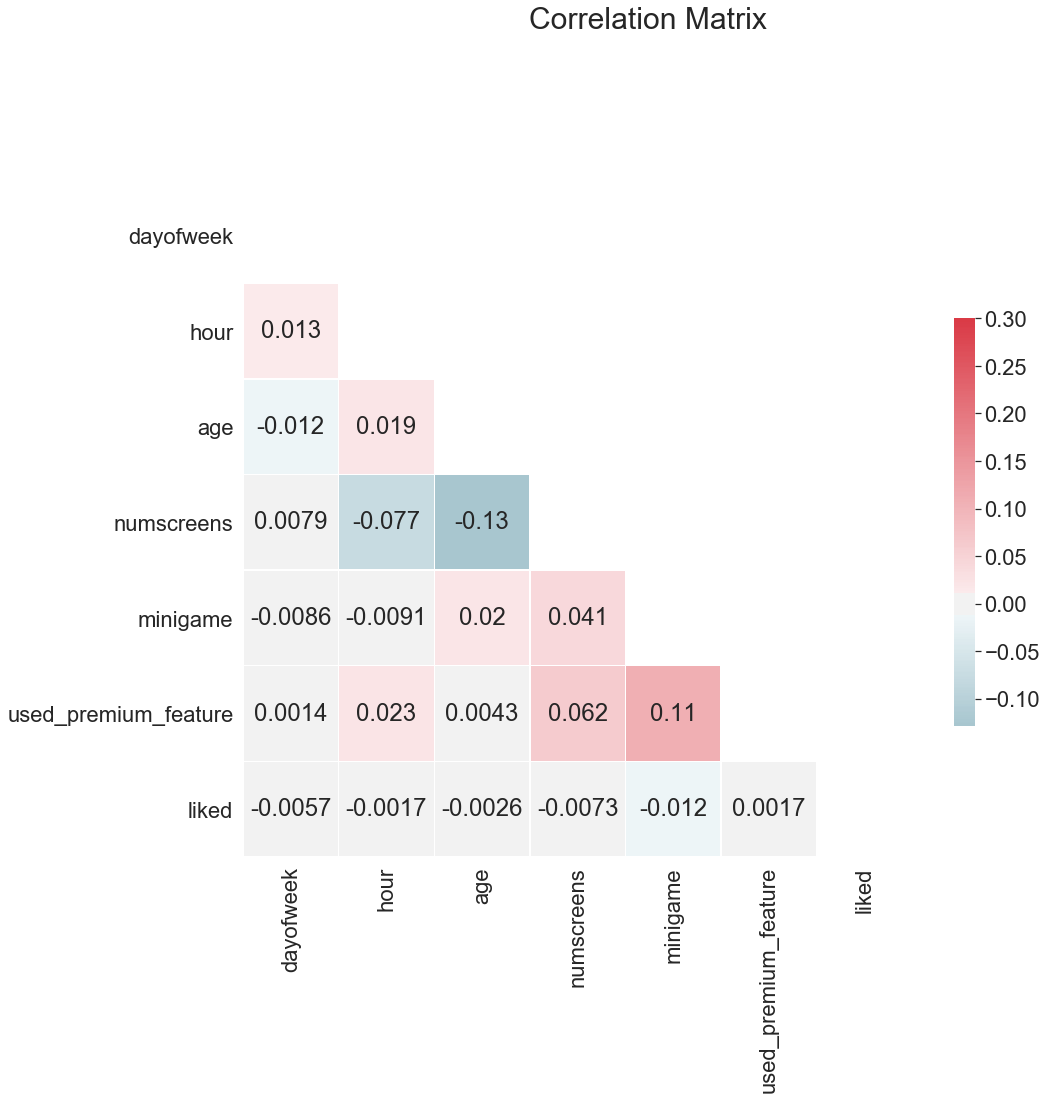

In [13]:
f, ax = plt.subplots(figsize = (15,15))
f.suptitle('Correlation Matrix', fontsize = 30)
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True,
            linewidth = .5,
            cbar_kws = {'shrink':.5}, annot = True)

In [14]:
dataset_temp = dataset.copy()
dataset_temp = dataset_temp.drop(columns = ['enrolled','user'])
dataset_temp['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset_temp['enrolled_date'] = [parser.parse(row_data) 
                                 if isinstance(row_data, str) else row_data  
                                 for row_data in dataset['enrolled_date']]

In [15]:
dataset_temp['difference'] = (dataset_temp.enrolled_date - dataset_temp.first_open).astype('timedelta64[h]')

In [16]:
dataset_temp['difference'].dropna().max()

5434.0

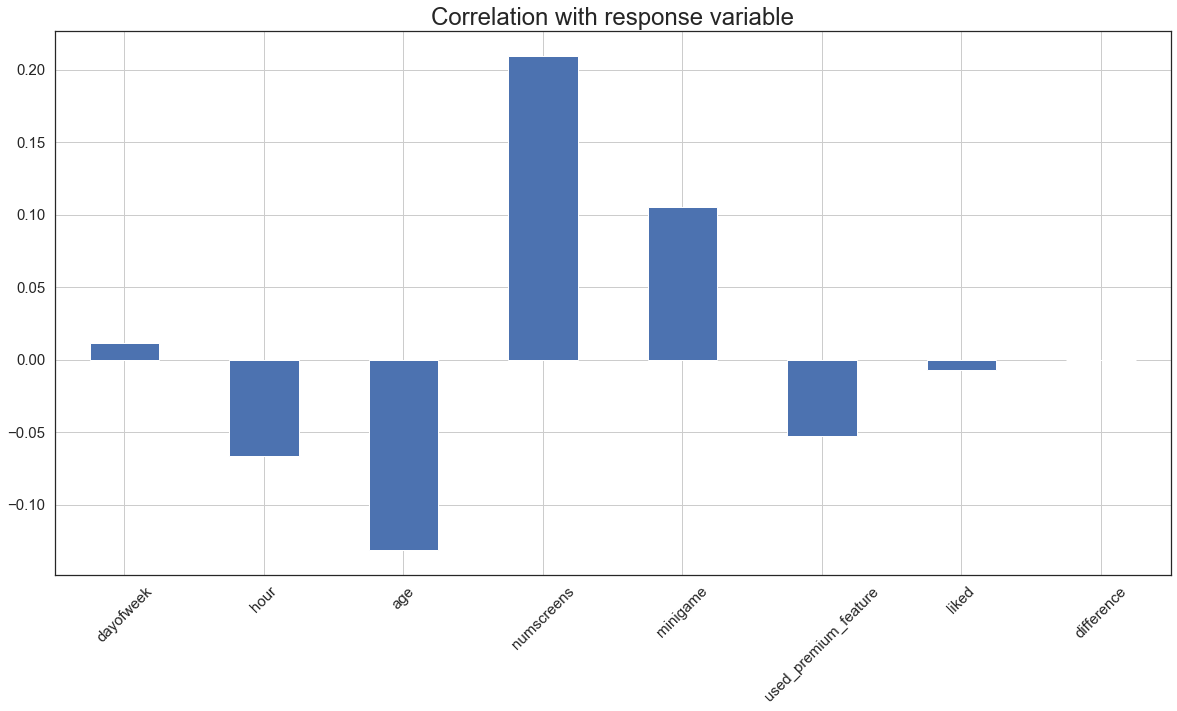

In [17]:
dataset_temp.corrwith(dataset.enrolled).plot.bar(figsize = (20,10), 
                                                 title = 'Correlation with response variable', 
                                                 fontsize = 15, 
                                                 rot = 45,
                                                 grid = True)

In [18]:
#dataset.loc[dataset.difference > 2, 'enrolled'] = 0
dataset = dataset.drop(columns=['first_open', 'enrolled_date'])

In [19]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [20]:
top_screens.size

58

In [21]:
dataset['screen_list'] = dataset.screen_list.astype(str)+','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')

dataset['Other'] = dataset.screen_list.str.count(',')
dataset = dataset.drop(columns = ['screen_list'])

In [22]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [23]:
savings_screens = ['Saving1', 'Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [24]:
cm_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
dataset['CMCount'] = dataset[cm_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)

In [25]:
cc_screens = ['CC1', 'CC1Category', 'CC3']
dataset['CCCount'] = dataset[cc_screens].sum(axis = 1)
dataset = dataset.drop(columns = cc_screens)

In [26]:
loan_screens = ['Loan','Loan2','Loan3','Loan4']
dataset['LoansCount'] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = loan_screens)

In [27]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [28]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

# Data preprocessing

In [29]:
response = dataset['enrolled']
dataset = dataset.drop(columns='enrolled')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [32]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
min_max_scaler = MinMaxScaler()
X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train.values), columns = cols)
X_test = pd.DataFrame(min_max_scaler.fit_transform(X_test.values), columns = cols)

# Logisitc Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear')
logreg.fit(X_train, Y_train)

Y_pred_logreg = logreg.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

conf_matrix_logreg = confusion_matrix(Y_test, Y_pred_logreg)
accuracy_score(Y_test, Y_pred_logreg)

0.7475

In [35]:
precision_score(Y_test, Y_pred_logreg)

0.7633228840125392

In [36]:
recall_score(Y_test, Y_pred_logreg)

0.861115576273911

In [37]:
f1_score(Y_test, Y_pred_logreg)

0.809275625047209

Test Data Accuracy: 0.7475


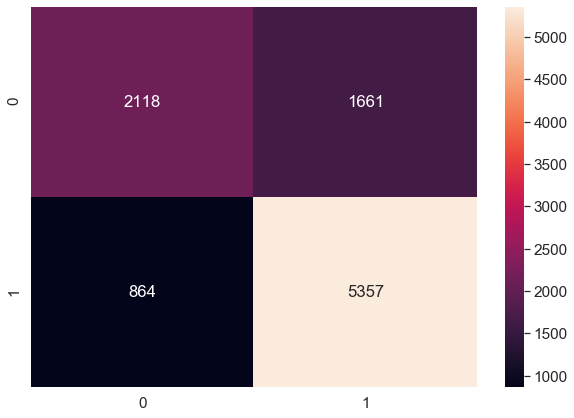

In [38]:
df_conf_matrix_logreg = pd.DataFrame(conf_matrix_logreg, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_conf_matrix_logreg, annot = True, fmt = 'g')
print("Test Data Accuracy: %0.4f"%accuracy_score(Y_test, Y_pred_logreg))

In [39]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = logreg, X = X_train, y = Y_train, cv = 12)

print("Logistic Accuracy: %0.3f (+/- %0.3f)"%(accuracies.mean(), accuracies.std()*2))

Logistic Accuracy: 0.757 (+/- 0.012)


In [40]:
model_accuracies_df = pd.DataFrame([['Logistic Regression Classifier', accuracies.mean(), f1_score(Y_test, Y_pred_logreg)]]
                                   , columns = ['Model', 'Accuracy', 'F1 Score'])

# Decision Trees

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(criterion = 'gini')

In [43]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
Y_pred_dtc = dtc.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

conf_matrix_dtc = confusion_matrix(Y_test, Y_pred_dtc)

print(accuracy_score(Y_test, Y_pred_dtc))
print(precision_score(Y_test, Y_pred_dtc))
print(recall_score(Y_test, Y_pred_dtc))
print(f1_score(Y_test, Y_pred_dtc))

0.7089
0.7581903276131046
0.7812248834592509
0.7695352703665584


Test Data Accuracy: 0.7089


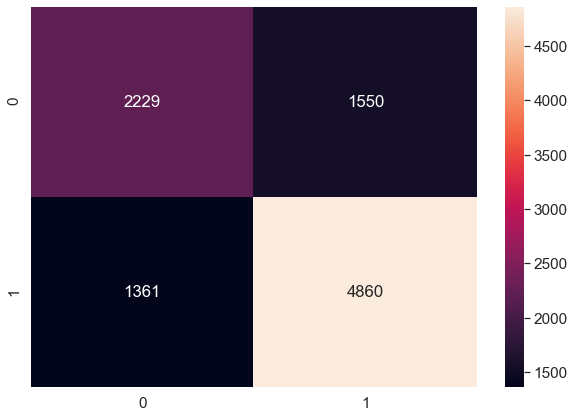

In [46]:
df_conf_matrix_dtc = pd.DataFrame(conf_matrix_dtc, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_conf_matrix_dtc, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(Y_test, Y_pred_dtc))

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dtc, X = X_train, y = Y_train, cv = 10)
print("Decision Tree Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Decision Tree Accuracy: 0.711 (+/- 0.015)


In [48]:
model_accuracies_df = model_accuracies_df.append({'Model' : 'Decision Tree Classifier', 
                                                  'Accuracy' : accuracies.mean(), 
                                                  'F1 Score' : f1_score(Y_test, Y_pred_dtc)}, ignore_index=True)

# Random Forest Classifier

In [49]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,Y_train)

Y_pred_rfc=rfc.predict(X_test)

In [50]:
conf_matrix_rfc = confusion_matrix(Y_test, Y_pred_rfc)

print(accuracy_score(Y_test, Y_pred_rfc))
print(precision_score(Y_test, Y_pred_rfc))
print(recall_score(Y_test, Y_pred_rfc))
print(f1_score(Y_test, Y_pred_rfc))

0.7744
0.795763091153215
0.857418421475647
0.8254410399257196


Test Data Accuracy: 0.7744


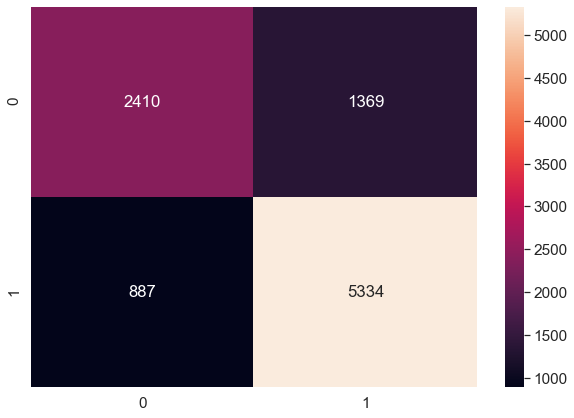

In [51]:
df_conf_matrix_rfc = pd.DataFrame(conf_matrix_rfc, index = (0, 1), columns = (0, 1))

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_conf_matrix_rfc, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(Y_test, Y_pred_rfc))

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.784 (+/- 0.007)


In [53]:
model_accuracies_df = model_accuracies_df.append({'Model' : 'Random Forest Classifier', 
                                                  'Accuracy' : accuracies.mean(), 
                                                  'F1 Score' : f1_score(Y_test, Y_pred_rfc)}, ignore_index=True)

In [54]:
model_accuracies_df 

,Model,Accuracy,F1 Score
0,Logistic Regression Classifier,0.757075,0.809276
1,Decision Tree Classifier,0.710725,0.769535
2,Random Forest Classifier,0.784000,0.825441


## Conclusion : Though Random Forest has the best F1 score, it is wise to go with Logistic Regression classifier as it is a simpler, less computationally expensive model.